Hands-on Lab: Introduction to API
Estimated time needed: 15 minutes

Objectives
After completing this lab you will be able to:

Create and use APIs in Python

Introduction
An API lets two pieces of software talk to each other. Just like a function, you don't have to know how the API works, only its inputs and outputs. An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library in the context of an API, we will also review a basic REST API.

REST APIs
Rest APIs function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In this lab, we will use the NBA API to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the Golden State Warriors lost by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication.

It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module teams.

In [1]:
!pip install nba_api

In [8]:
from nba_api.stats.static import teams
import pandas as pd
import matplotlib.pyplot as plt
type(teams)

module

In [4]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [5]:
# The method get_teams() returns a list of dictionaries.
nba_teams = teams.get_teams()

The dictionary key id has a unique identifier for each team as a value. Let's look at the first three elements of the list:

In [6]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function one dict, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team. We then convert the dictionary to a dataframe, each row contains the information for a different team.

In [9]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:

In [10]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [11]:
# We can use the following line of code to access the first column of the DataFrame:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

np.int64(1610612744)

In [ ]:
# The function "League Game Finder " will make an API call, it's in the module stats.endpoints.


In [12]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter team_id_nullable is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.
The information requested is provided and is transmitted via an HTTP response this is assigned to the object game finder.

In [13]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [14]:
# We can see the json file by running the following line of code.
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612744", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

The game finder object has a method get_data_frames(), that returns a dataframe. If we view the dataframe, we can see it contains information about all the games the Warriors played. The PLUS_MINUS column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column MATCHUP has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. vs signifies it was a home game and the @ symbol means an away game.

In [16]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42024,1610612744,GSW,Golden State Warriors,0042400151,2025-04-20,GSW @ HOU,W,240,95,...,0.786,6.0,30.0,36.0,20,14,1,11,18,10.0
1,52024,1610612744,GSW,Golden State Warriors,0052400121,2025-04-15,GSW vs. MEM,W,241,121,...,0.824,13.0,26.0,39.0,29,13,3,10,23,5.0
2,22024,1610612744,GSW,Golden State Warriors,0022401198,2025-04-13,GSW vs. LAC,L,265,119,...,0.783,3.0,22.0,25.0,31,11,6,15,20,-5.0
3,22024,1610612744,GSW,Golden State Warriors,0022401183,2025-04-11,GSW @ POR,W,240,103,...,0.821,7.0,38.0,45.0,26,15,7,14,19,17.0
4,22024,1610612744,GSW,Golden State Warriors,0022401163,2025-04-09,GSW vs. SAS,L,239,111,...,0.821,16.0,29.0,45.0,29,8,2,10,19,-3.0


In [17]:
# You can download the dataframe from the API call for Golden State and run the rest like a video.
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [18]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.

In [19]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away:

In [20]:
games_home['PLUS_MINUS'].mean()

np.float64(3.730769230769231)

In [21]:
games_away['PLUS_MINUS'].mean()

np.float64(-0.6071428571428571)

We can plot out the PLUS MINUS column for the dataframes games_home and  games_away. We see the warriors played better at home.

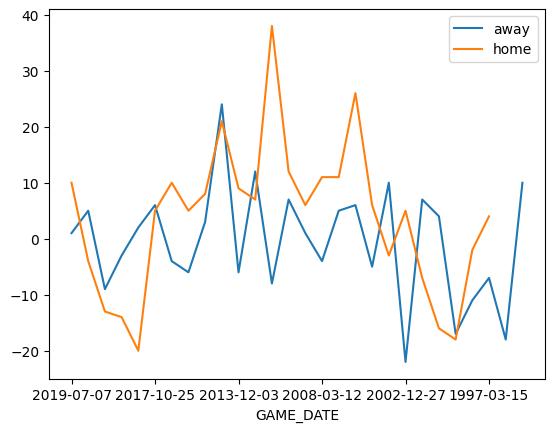

In [23]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

Practice Project: GDP Data extraction and processing
Estimated time needed: 30 minutes

Introduction
In this practice project, you will put the skills acquired through the course to use. You will extract data from a website using webscraping and reqeust APIs process it using Pandas and Numpy libraries.

Project Scenario:
An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

The required data seems to be available on the URL mentioned below:

URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

Objectives
After completing this lab you will be able to:

# Use Webscraping to extract required information from a website.
# Use Pandas to load and process the tabular data as a dataframe.
# Use Numpy to manipulate the information contatined in the dataframe.
# Load the updated dataframe to CSV file.


Dislcaimer
If you are using a downloaded version of this notebook on your local machine, you may encounter a warning message as shown in the screenshot below.

This does not affect the execution of your codes in any way and can be simply ignored

In [ ]:
Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.

In [24]:
#Install required packages
!pip install pandas numpy 
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.7 MB/s eta 0:00:00a 0:00:01


In [25]:
# Importing Required Libraries
# We recommend you import all required libraries in one place (here):

import numpy as np
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

Exercises
Exercise 1
Extract the required GDP data from the given URL using Web Scraping.

You can use Pandas library to extract the required table directly as a DataFrame. Note that the required table is the third one on the website, as shown in the image below.

In [ ]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.

# Assign column names as "Country" and "GDP (Million USD)"


In [42]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
url = 'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'
tables = pd.read_html(url)
df = tables[3]
print (df)
# Replace the column headers with column numbers
df.columns = range(df.shape[1])
print(df)

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]
print(df)

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']
print(df)

    Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year  

Exercise 2
Modify the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the round() method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to GDP (Billion USD).

In [ ]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.

# Convert the GDP value in Million USD to Billion USD

# Use numpy.round() method to round the value to 2 decimal places.

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'

In [46]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

In [47]:
# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

In [48]:
# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

In [49]:
df.rename(columns = {'GDP (Million USD)': 'GDP (Billion USD)'})

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


In [51]:
# Load the DataFrame to the CSV file named "Largest_economies.csv"
# Load the DataFrame to the CSV file named "Largest_economies.csv"
df.to_csv('CSV files/GDP Data extraction and processing project/Largest_economies.csv')

HTTP and Requests
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be able to:

Understand HTTP
Handle HTTP Requests

In [ ]:
## Requests in Python

In [52]:
import requests

In [53]:
# We will also use the following libraries:
import os 
from PIL import Image
from IPython.display import IFrame

In [54]:
# You can make a GET request via the method get to www.ibm.com:
url='https://www.ibm.com/'
r=requests.get(url)
# We have the response object r, this has information about the request, like the status of the request. 
# We can view the status code using the attribute status_code.

In [55]:
r.status_code

200

In [56]:
# You can view the request headers:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=1C66A1ABF26A6940250B42B7E3875766~-1~YAAQl65NaGXQVUeWAQAAm2zlYg1Fxej7HykRrL/vlU5GgUKFYxN10mKSmQ8VtwUidpVNYFA8kpIWrI6gyo5e/A35ofcsSJbdKLK7w9COAIB42fTf6eMpapy9v7Mo98UF57FK2BhGvJAc2Q6ka5tZ79b4oO2jz5dWQPTL+6YUmH9RkVVmymSNatOz9bxwqMhnsua4JYK8cscPOp7oGEwCxmo+KKRH99lFDZ6IuIylNAioctjz5fkwizw5Lv+AeZKXAPZ8Xteasgi7VRZVla3YAMlrNw4LGdaP8Co6kgiiUrBwhns93k3fb8jn56Q6c1OAqShdEYVUB63yNXEnK7GZ6yGBpaMdmFLh8yegC1JZ46cS3NyH+ifeWHTCj8ay4VkEcg8UyjGTx0LnkWAXEWsYNSkKMOceIt0=~-1~-1~-1; bm_sz=260FD68D1851715A55D53E0930EF4356~YAAQl65NaGbQVUeWAQAAm2zlYhsNn2qQHas8xHXNvt9OIA38uCuG2KIB37dWQUiLq3ipArYa4SlBhW/Ee8DEm/4pUXWEx5pFkPMz6oRuOT4kgkjgM2YON1L9ibWl9V82pmz7nSTh4cmkKvNeItnku7xnUpcRYNwMRf96m6pLQnJVyP3+jUtNKCTbY2RfxJ+B/NKkZwycI35QTWn2nB3/Mjvs01TGZd70r8FT9TKVeBWojlvMbOMbnpbgAiXYnYXQwVmOV4XH1HEaco1iXzwnoJ1t3+clt30dTJRDKJIMATMd61IJs1EsWNJN3hytXK175GiCHfZJFa9Vo2hg2mDFfqHeW+9O7UEZgGieqjv

In [57]:
# You can view the request body, in the following line, as there is no body for a get request we get 
# a None:
print("request body:", r.request.body)

request body: None


You can view the HTTP response header using the attribute headers. This returns a python dictionary of HTTP response headers.

In [58]:
header=r.headers
print(r.headers)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Wed, 23 Apr 2025 13:35:57 GMT', 'ETag': 'W/"290e1-633722e5ef0b9-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Wed, 23 Apr 2025 13:55:24 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Wed, 23 Apr 2025 13:45:24 GMT', 'Content-Length': '29638', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


In [59]:
# We can obtain the date the request was sent using the key Date.
header['date']

'Wed, 23 Apr 2025 13:45:24 GMT'

In [60]:
# Content-Type indicates the type of data:
header['Content-Type']

'text/html;charset=utf-8'

In [62]:
# You can also check the encoding:
r.encoding

'utf-8'

As the Content-Type is text/html we can use the attribute text to display the HTML in the body. We can review the first 100 characters:

In [63]:
r.text[0:100]

'\n<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n  '

In [64]:
# You can load other types of data for non-text requests, like images. 
# Consider the URL of the following image:
# Use single quotation marks for defining string
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'

In [65]:
# We can make a get request:
r=requests.get(url)

In [66]:
# We can look at the response header:
print(r.headers)

{'Date': 'Wed, 23 Apr 2025 13:49:33 GMT', 'X-Clv-Request-Id': '403d41d9-b70c-48c9-b4c8-2fd7b30baabb', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': '403d41d9-b70c-48c9-b4c8-2fd7b30baabb', 'ETag': '"8bb44578fff8fdcc3d2972be9ece0164"', 'Content-Type': 'image/png', 'Last-Modified': 'Wed, 16 Nov 2022 03:32:41 GMT', 'Content-Length': '78776'}


In [67]:
# We can see the 'Content-Type'
r.headers['Content-Type']

'image/png'

An image is a response object that contains the image as a bytes-like object. As a result, we must save it using a file object. First, we specify the file path and name

In [68]:
path=os.path.join(os.getcwd(),'images/image.png')

We save the file, in order to access the body of the response we use the attribute content then save it using the open function and write method:

In [69]:
with open(path,'wb') as f:
    f.write(r.content)

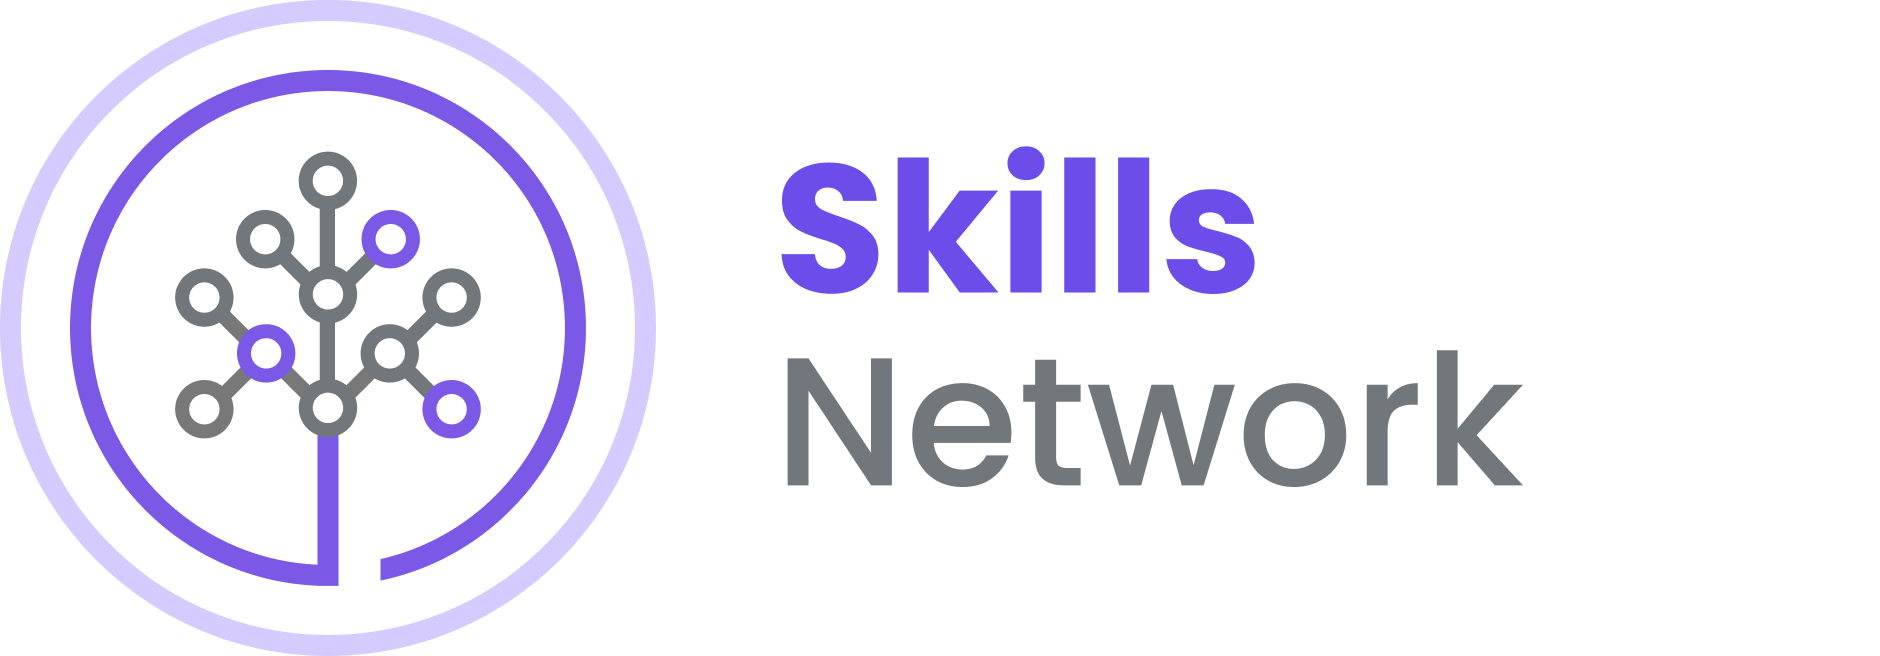

In [70]:
# We can view the image:
Image.open(path)

Question: Download a file 
Consider the following URL.
URL = <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt

In [71]:
# Write the commands to download the txt file in the given link.
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path=os.path.join(os.getcwd(),'txtfiles/downloaded text files/example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

Get Request with URL Parameters

You can use the GET method to modify the results of your query, for example retrieving data from an API. We send a GET request to the server. Like before we have the Base URL, in the Route we append /get, this indicates we would like to preform a GET request.

The Base URL is for http://httpbin.org/ is a simple HTTP Request & Response Service. The URL in Python is given by:

In [72]:
url_get='http://httpbin.org/get'

A query string is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a ?, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is name and the value is Joseph. The second parameter name is ID and the Value is 123. Each pair, parameter, and value is separated by an equals sign, =. The series of pairs is separated by the ampersand &.

To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.

In [73]:
payload={"name":"Joseph","ID":"123"}

In [74]:
# Then passing the dictionary payload to the params parameter of the  get() function:
r=requests.get(url_get,params=payload)

In [75]:
# We can print out the URL and see the name and values.
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [82]:
# There is no request body.
print("request body:", r.request.body)

request body: None


In [77]:
# We can print out the status code.
print(r.status_code)

503


In [78]:
# We can view the response as text:
print(r.text)

<html>
<head><title>503 Service Temporarily Unavailable</title></head>
<body>
<center><h1>503 Service Temporarily Unavailable</h1></center>
</body>
</html>



In [79]:
# We can look at the 'Content-Type'.
r.headers['Content-Type']

'text/html'

As the content 'Content-Type' is in the JSON format we can use the method json(), it returns a Python dict:

In [80]:
r.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [81]:
# The key args has the name and values:
r.json()['args']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Post Requests
Like a GET request, a POST is used to send data to a server, but the POST request sends the data in a request body. In order to send the Post Request in Python, in the URL we change the route to POST:

In [84]:
url_post='http://httpbin.org/post'

This endpoint will expect data as a file or as a form. A form is convenient way to configure an HTTP request to send data to a server.

To make a POST request we use the post() function, the variable payload is passed to the parameter  data :

In [85]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the GET and POST request we see the POST request has no name or value pairs.

In [87]:
print("POST request URL:",response.url )
print("GET request URL:",r.url)
print("POST request URL:", r_post.url)  # Use r_post instead of response

POST request URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29
GET request URL: http://httpbin.org/get?name=Joseph&ID=123
POST request URL: http://httpbin.org/post


In [89]:
# We can compare the POST and GET request body, we see only the POST request has a body:
print("POST request body:",response.request.body)
print("GET request body:",r.request.body)

POST request body: None
GET request body: None


In [90]:
# We can view the form as well:
response.json()['form']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Hands-on Lab: API Examples
Random User and Fruityvice API Examples
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be able to:

Load and use RandomUser API, using RandomUser() Python library
Load and use Fruityvice API, using requests Python library
Load and use Open-Joke-API, using requests Python library

The purpose of this notebook is to provide more examples on how to use simple APIs. As you have already learned from previous videos and notebooks, API stands for Application Programming Interface and is a software intermediary that allows two applications to talk to each other.

The advantages of using APIs:

Automation. Less human effort is required and workflows can be easily updated to become faster and more
productive.
Efficiency. It allows to use the capabilities of one of the already developed APIs than to try to independently implement some functionality from scratch.


The disadvantage of using APIs:

Security. If the API is poorly integrated, it means it will be vulnerable to attacks, resulting in data breeches or losses having financial or reputation implications.


One of the applications we will use in this notebook is Random User Generator. RandomUser is an open-source, free API providing developers with randomly generated users to be used as placeholders for testing purposes. This makes the tool similar to Lorem Ipsum, but is a placeholder for people instead of text. The API can return multiple results, as well as specify generated user details such as gender, email, image, username, address, title, first and last name, and more. More information on RandomUser can be found here.

Another example of simple API we will use in this notebook is Fruityvice application. The Fruityvice API web service which provides data for all kinds of fruit! You can use Fruityvice to find out interesting information about fruit and educate yourself. The web service is completely free to use and contribute to.

Example 1: RandomUser API
Bellow are Get Methods parameters that we can generate. For more information on the parameters, please visit this documentation page.


Get Methods
get_cell()
get_city()
get_dob()
get_email()
get_first_name()
get_full_name()
get_gender()
get_id()
get_id_number()
get_id_type()
get_info()
get_last_name()
get_login_md5()
get_login_salt()
get_login_sha1()
get_login_sha256()
get_nat()
get_password()
get_phone()
get_picture()
get_postcode()
get_registered()
get_state()
get_street()
get_username()
get_zipcode()

In [ ]:
# To start using the API you can install the randomuser library running the pip install command.

In [91]:
!pip install randomuser
!pip install pandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5106 sha256=faf0bd340f3dac7180f962e85a8227316db8631a35d88052f24b6e473919d39e
  Stored in directory: /Users/amrmostafa/Library/Caches/pip/wheels/a8/ce/f1/713605b6f257e4f0efca0fe272df8e2427bd335cf907ab0dff
Successfully built randomuser


In [92]:
# Then, we will load the necessary libraries.
from randomuser import RandomUser
import pandas as pd

In [93]:
# First, we will create a random user object, r
r = RandomUser()

In [95]:
# Then, using generate_users() function, we get a list of random 10 users.
some_list = r.generate_users(10)
some_list

The "Get Methods" functions mentioned at the beginning of this notebook, can generate the required parameters to construct a dataset. For example, to get full name, we call get_full_name() function.

In [96]:
name = r.get_full_name()

Let's say we only need 10 users with full names and their email addresses. We can write a "for-loop" to print these 10 users

In [97]:
for user in some_list:
    print (user.get_full_name()," ",user.get_email())

Zenon Seemann   zenon.seemann@example.com
Haije Coppoolse   haije.coppoolse@example.com
Eemeli Peltola   eemeli.peltola@example.com
Alexis Smith   alexis.smith@example.com
Maya Slawa   maya.slawa@example.com
Katie Mitchell   katie.mitchell@example.com
Damy Schild   damy.schild@example.com
Gül Akgül   gul.akgul@example.com
John Carpenter   john.carpenter@example.com
Sarah Williamson   sarah.williamson@example.com


Exercise 1
In this Exercise, generate photos of the random 10 users.

In [98]:
for user in some_list:
    print (user.get_picture())

https://randomuser.me/api/portraits/men/24.jpg
https://randomuser.me/api/portraits/men/29.jpg
https://randomuser.me/api/portraits/men/93.jpg
https://randomuser.me/api/portraits/men/38.jpg
https://randomuser.me/api/portraits/women/68.jpg
https://randomuser.me/api/portraits/women/41.jpg
https://randomuser.me/api/portraits/men/14.jpg
https://randomuser.me/api/portraits/women/14.jpg
https://randomuser.me/api/portraits/men/27.jpg
https://randomuser.me/api/portraits/women/55.jpg


To generate a table with information about the users, we can write a function containing all desirable parameters. For example, name, gender, city, etc. The parameters will depend on the requirements of the test to be performed. We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users.

In [99]:
def get_users():
    users =[]
     
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
      
    return pd.DataFrame(users)     

In [100]:
get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Sofia Maki,female,Kitee,Tavastia Proper,sofia.maki@example.com,1974-08-26T12:01:38.176Z,https://randomuser.me/api/portraits/women/82.jpg
1,Emilia Arias,female,Cuenca,Asturias,emilia.arias@example.com,1957-12-02T13:18:09.364Z,https://randomuser.me/api/portraits/women/43.jpg
2,Özkan Velioğlu,male,Ordu,Kastamonu,ozkan.velioglu@example.com,1983-04-06T13:32:29.164Z,https://randomuser.me/api/portraits/men/35.jpg
3,Oscar Thomsen,male,Horsens,Midtjylland,oscar.thomsen@example.com,1949-09-24T18:17:03.912Z,https://randomuser.me/api/portraits/men/86.jpg
4,Ilyès Mercier,male,Pau,Morbihan,ilyes.mercier@example.com,1984-01-27T08:52:57.782Z,https://randomuser.me/api/portraits/men/96.jpg
5,Sarah Barbier,female,Le Havre,Loir-et-Cher,sarah.barbier@example.com,1970-01-22T22:38:52.123Z,https://randomuser.me/api/portraits/women/88.jpg
6,Terry Watkins,male,Liverpool,Highlands and Islands,terry.watkins@example.com,1964-01-23T05:43:17.126Z,https://randomuser.me/api/portraits/men/79.jpg
7,Zoe Graham,female,Akron,Missouri,zoe.graham@example.com,1988-01-28T13:36:47.546Z,https://randomuser.me/api/portraits/women/55.jpg
8,Johanne Olsen,female,Jystrup,Midtjylland,johanne.olsen@example.com,1983-01-21T13:13:10.494Z,https://randomuser.me/api/portraits/women/33.jpg
9,Hinderika Ossenblok,female,Toornwerd,Flevoland,hinderika.ossenblok@example.com,1997-09-08T12:20:21.823Z,https://randomuser.me/api/portraits/women/25.jpg


In [101]:
df1 = pd.DataFrame(get_users())  

Example 2: Fruityvice API
Another, more common way to use APIs, is through requests library. The next lab, Requests and HTTP, will contain more information about requests.

We will start by importing all required libraries.

In [102]:
import requests
import json

We will obtain the fruityvice API data using requests.get("url") function. The data is in a json format.

In [103]:
data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")

In [ ]:
# We will retrieve results using json.loads() function.


In [104]:
results = json.loads(data.text)

In [105]:
# We will convert our json data into pandas data frame.
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


The result is in a nested json format. The 'nutrition' column contains multiple subcolumns, so the data needs to be 'flattened' or normalized.

In [106]:
df2 = pd.json_normalize(results)

In [107]:
df2

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


Let's see if we can extract some information from this dataframe. Perhaps, we need to know the family and genus of a cherry.

Exercise 2
In this Exercise, find out how many calories are contained in a banana.

In [108]:
cal_banana = df2.loc[df2["name"] == 'Banana']
cal_banana.iloc[0]['nutritions.calories']

np.int64(96)

Exercise 3
This page contains a list of free public APIs for you to practice. Let us deal with the following example.

Official Joke API
This API returns random jokes from a database. The following URL can be used to retrieve 10 random jokes.

https://official-joke-api.appspot.com/jokes/ten

Using requests.get("url") function, load the data from the URL.

In [109]:
data2 = requests.get("https://official-joke-api.appspot.com/jokes/ten")

In [110]:
# Retrieve results using json.loads() function.
results2 = json.loads(data2.text)

In [111]:
# Convert json data into pandas data frame. Drop the type and id columns.
df3 = pd.DataFrame(results2)
df3.drop(columns=["type","id"],inplace=True)
df3

,setup,punchline
0,What do you call a fly without wings?,A walk.
1,How many programmers does it take to change a ...,None that's a hardware problem
2,What did the digital clock say to the grandfat...,"Look, no hands!"
3,What kind of shoes does a thief wear?,Sneakers
4,I bought some shoes from a drug dealer.,"I don't know what he laced them with, but I wa..."
5,Why can’t you hear a pterodactyl go to the bat...,The p is silent.
6,Why did the developer quit his job?,Because he didn't get arrays.
7,How does the moon cut his hair?,Eclipse it.
8,Knock knock. \n Who's there? \n Cows go. \n Co...,"No, cows go moo."
9,Did you hear about the crime in the parking ga...,It was wrong on so many levels.


Web Scraping Lab
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be:

Familiar with the basics of the BeautifulSoup Python library
Be able to scrape webpages for data and filter the data
Table of Contents
Beautiful Soup Object
Tag
Children, Parents, and Siblings
HTML Attributes
Navigable String
Filter
find All
find
HTML Attributes
Navigable String
Downloading And Scraping The Contents Of A Web

For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.

In [112]:
!pip install bs4
!pip install requests pandas html5lib

In [4]:
# Import the required modules and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Beautiful Soup Objects
Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML. We can navigate the HTML as a tree, and/or filter out what we are looking for.

Consider the following HTML:

%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [5]:
# We can store it as a string in the variable HTML:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the BeautifulSoup constructor. The BeautifulSoup object represents the document as a nested data structure:

In [116]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [6]:
soup = BeautifulSoup(html, 'html5lib')

First, the document is converted to Unicode (similar to ASCII) and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The BeautifulSoup object can create other types of objects. In this lab, we will cover BeautifulSoup and Tag objects, that for the purposes of this lab are identical. Finally, we will look at NavigableString objects.

In [7]:
# We can use the method prettify() to display the HTML in the nested structure
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



Tags
Let's say we want the title of the page and the name of the top paid player. We can use the Tag. The Tag object corresponds to an HTML tag in the original document, for example, the tag title.

In [8]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type bs4.element.Tag

In [9]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one Tag with the same name, the first element with that Tag name is called. This corresponds to the most paid player:

In [10]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute b, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name.

Children, Parents, and Siblings
As stated above, the Tag object is a tree of objects. We can access the child of the tag or navigate down the branch as follows:

In [11]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [12]:
# You can access the parent with the  parent
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [13]:
# this is identical to:

tag_object


<h3><b id="boldest">Lebron James</b></h3>

In [14]:
# tag_object parent is the body element.
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

In [15]:
# tag_object sibling is the paragraph element
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [16]:
# sibling_2 is the header element, which is also a sibling of both sibling_1 and tag_object
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

HTML Attributes
If the tag has attributes, the tag id="boldest" has an attribute id whose value is boldest. You can access a tag’s attributes by treating the tag like a dictionary:

In [17]:
tag_child['id']

'boldest'

In [18]:
# You can access that dictionary directly as attrs:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attributes. Check out [1] for more.

We can also obtain the content of the attribute of the tag using the Python get() method.

In [19]:
tag_child.get('id')

'boldest'

Navigable String
A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the NavigableString class to contain this text. In our HTML we can obtain the name of the first player by extracting the string of the Tag object tag_child as follows:

In [20]:
tag_string=tag_child.string
tag_string

'Lebron James'

In [22]:
# we can verify the type is Navigable String
type(tag_string)

bs4.element.NavigableString

A NavigableString is similar to a Python string or Unicode string. To be more precise, the main difference is that it also supports some BeautifulSoup features. We can convert it to string object in Python:

In [23]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

Filter
Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string. Consider the following HTML of rocket launches:

%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

In [24]:
# We can store it as a string in the variable table:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [25]:
table_bs = BeautifulSoup(table, 'html5lib')

find All
The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.

The Method signature for find_all(name, attrs, recursive, string, limit, **kwargs)

Name
When we set the name parameter to a tag name, the method will extract all the tags with that name and its children.

In [26]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>]

In [27]:
# The result is a Python Iterable just like a list, each element is a tag object:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [28]:
# The type is tag
print(type(first_row))
# we can obtain the child
first_row.td

<class 'bs4.element.Tag'>


<td id="flight">Flight No</td>

In [29]:
# If we iterate through the list, each element corresponds to a row in the table:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


As row is a cell object, we can apply the method find_all to it and extract table cells in the object cells using the tag td, this is all the children with the name td. The result is a list, each element corresponds to a cell and is a Tag object, we can iterate through this list as well. We can extract the content using the string attribute.

In [30]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
colunm 2 cell <td>80 kg</td>


In [31]:
# If we use a list we can match against any item in that list.
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>,
 <td>80 kg</td>]

Attributes
If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example with the id argument, Beautiful Soup will filter against each tag’s id attribute. For example, the first td elements have a value of id of flight, therefore we can filter based on that id value.

In [32]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

In [33]:
# We can find all the elements that have links to the Florida Wikipedia page:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

If we set the href attribute to True, regardless of what the value is, the code finds all tags with href value:

In [34]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

string
With string you can search for strings instead of tags, where we find all the elments with Florida:

In [35]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

find
The find_all() method scans the entire document looking for results. It’s useful if you are looking for one element, as you can use the find() method to find the first element in the document. Consider the following two tables:

%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>

In [36]:
# We store the HTML as a Python string and assign two_tables:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [37]:
# We create a BeautifulSoup object two_tables_bs
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

In [38]:
# We can find the first table using the tag name table
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore to differentiate them.

In [39]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

Downloading And Scraping The Contents Of A Web Page

We Download the contents of the web page:

In [43]:
url = "http://www.ibm.com"
data  = requests.get(url).text 

In [44]:
# We create a BeautifulSoup object using the BeautifulSoup constructor
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

In [45]:
# Scrape all links
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))

https://www.ibm.com/granite?lnk=hpad1au
https://developer.ibm.com/technologies/artificial-intelligence?lnk=hpad2au
https://www.ibm.com/products/watsonx-code-assistant?lnk=hpad3au
https://www.ibm.com/watsonx/developer/?lnk=hpad4au
https://www.ibm.com/thought-leadership/institute-business-value/report/ceo-generative-ai?lnk=hpab1au
https://www.ibm.com/think/videos/ai-academy?lnk=hpab2au
https://www.ibm.com/products/watsonx-orchestrate/ai-agent-for-hr?lnk=hpab3au
https://www.ibm.com/products/guardium-data-security-center?lnk=hpab4au
https://www.ibm.com/artificial-intelligence?lnk=hpfp1au
https://www.ibm.com/hybrid-cloud?lnk=hpfp2au
https://www.ibm.com/consulting?lnk=hpfp3au


In [47]:
# Scrape all images Tags
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

In [48]:
# Scrape data from HTML tables
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents and the way data is organized on the website. Open the above url in your browser and check how many rows and columns there are in the color table.

In [49]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [50]:
soup = BeautifulSoup(data,"html5lib")

In [51]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [52]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF
